In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
# Load the dataset
#data = sns.load_dataset("tips")
data = pd.read_csv('/content/tips.csv')

In [17]:
# Data Inspection
print(data.info())
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
total_bill    0
tip           0
sex           0
smoker        0
day           0
t

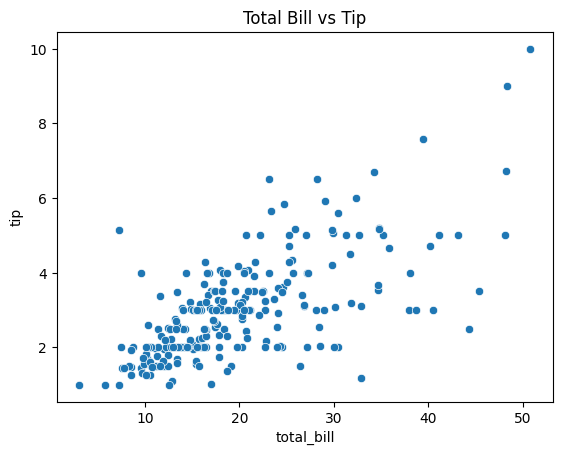

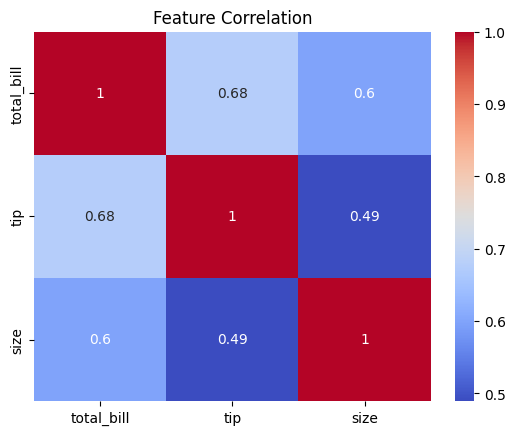

In [18]:
# Data Visualization
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Total Bill vs Tip')
plt.show()

sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Feature Correlation')
plt.show()

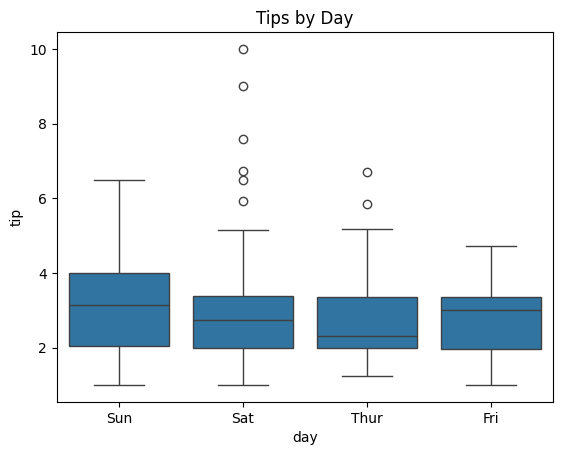

In [19]:
# Box plots for categorical variables
sns.boxplot(x='day', y='tip', data=data)
plt.title('Tips by Day')
plt.show()

In [23]:
# Data Preparation
# Encoding categorical variables
categorical_features = ['sex', 'smoker', 'day', 'time']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_transformed = encoder.fit_transform(data[categorical_features])
categorical_df = pd.DataFrame(categorical_transformed, columns=encoder.get_feature_names_out())


In [24]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['total_bill', 'size']
numerical_scaled = scaler.fit_transform(data[numerical_features])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

In [25]:
# Creating final dataset
X = pd.concat([numerical_df, categorical_df], axis=1)
y = data['tip']


In [26]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Model Building
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}\n")

Linear Regression:
MSE: 0.70335660174361
RMSE: 0.8386635807900628
MAE: 0.6671331480264893
R² Score: 0.4373018194348254

Ridge Regression:
MSE: 0.7006322795075869
RMSE: 0.8370378005249147
MAE: 0.6668621239595696
R² Score: 0.4394813271862039

Lasso Regression:
MSE: 1.4486680232392768
RMSE: 1.2036062575607012
MAE: 1.047104133961277
R² Score: -0.15896098636013822



In [29]:
# Hyperparameter Tuning for Ridge Regression
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
print(f"Best Ridge Alpha: {ridge_grid.best_params_}")


Best Ridge Alpha: {'alpha': 10}


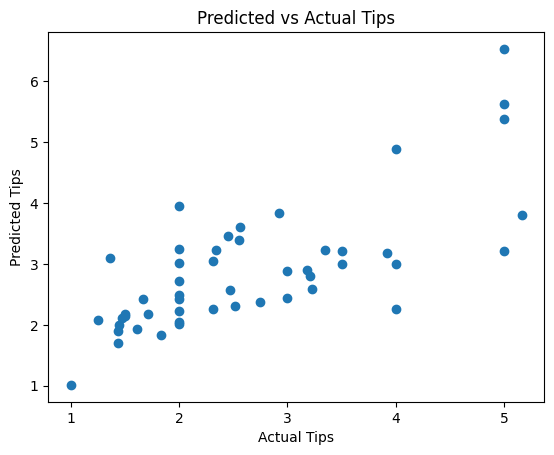

In [30]:

# Final Model Evaluation
y_final_pred = ridge_grid.best_estimator_.predict(X_test)
plt.scatter(y_test, y_final_pred)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Predicted vs Actual Tips")
plt.show()
